In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Users\nihall\Desktop\mlops-clinical-risk-prediction\data\raw\sepsis_datasets.csv")

In [13]:
dataset_summary = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Data Types": df.dtypes.to_dict(),
    "Missing Values": df.isnull().sum().to_dict(),
    "First Few Rows": df.head().to_dict()
}

dataset_summary

{'Shape': (971, 13),
 'Columns': ['Patient_ID',
  'Age',
  'Gender',
  'Comorbidities',
  'Heart_Rate',
  'BP_Systolic',
  'BP_Diastolic',
  'Temperature',
  'Respiratory_Rate',
  'WBC_Count',
  'Lactate_Level',
  'Clinical_Notes',
  'Sepsis_Label'],
 'Data Types': {'Patient_ID': dtype('O'),
  'Age': dtype('int64'),
  'Gender': dtype('O'),
  'Comorbidities': dtype('O'),
  'Heart_Rate': dtype('int64'),
  'BP_Systolic': dtype('int64'),
  'BP_Diastolic': dtype('int64'),
  'Temperature': dtype('float64'),
  'Respiratory_Rate': dtype('int64'),
  'WBC_Count': dtype('float64'),
  'Lactate_Level': dtype('float64'),
  'Clinical_Notes': dtype('O'),
  'Sepsis_Label': dtype('int64')},
 'Missing Values': {'Patient_ID': 0,
  'Age': 0,
  'Gender': 0,
  'Comorbidities': 363,
  'Heart_Rate': 0,
  'BP_Systolic': 0,
  'BP_Diastolic': 0,
  'Temperature': 0,
  'Respiratory_Rate': 0,
  'WBC_Count': 0,
  'Lactate_Level': 0,
  'Clinical_Notes': 0,
  'Sepsis_Label': 0},
 'First Few Rows': {'Patient_ID': {0: 'P

# Dataset Summary:
- Shape: 990 rows × 13 columns
#### Columns:
- Patient_ID (Identifier)
- Age (Numeric but stored as object)
- Gender (Categorical)
- Comorbidities (Categorical)
- Heart_Rate (Numeric but stored as object)
- BP_Systolic, BP_Diastolic (Numeric but stored as object)
- Temperature, Respiratory_Rate, WBC_Count, Lactate_Level (Numeric but stored as object)
- Clinical_Notes (Textual data)
- Sepsis_Label (Target: 0 = No Sepsis, 1 = Sepsis)
#### issues Identified:
- Many numerical columns (Age, Heart_Rate, etc.) are stored as objects and need conversion.
- Missing values exist in some columns, especially WBC_Count, Lactate_Level, and Clinical_Notes.
- Clinical_Notes is a text column, which requires NLP-based preprocessing if used.


# Exploratory Data Analysis (EDA) 

In [14]:
df.head(4)

,Patient_ID,Age,Gender,Comorbidities,Heart_Rate,BP_Systolic,BP_Diastolic,Temperature,Respiratory_Rate,WBC_Count,Lactate_Level,Clinical_Notes,Sepsis_Label
0,P001,62,Male,Hypertension,105,155,85,38.2,22,12.5,1.2,Patient presented with fever and tachycardia. ...,1
1,P002,35,Female,NaN,80,120,70,36.5,16,7.8,0.8,"Stable vitals, no signs of infection. Monitori...",0
2,P003,78,Female,Diabetes,115,95,55,39.5,28,14.2,3.1,Severe hypotension and high lactate levels. Su...,1
3,P004,48,Male,COPD,92,138,82,37.8,20,9.5,1.0,"Fever, elevated WBC count, and respiratory dis...",1


In [15]:
numeric_cols = ['Age', 'Heart_Rate', 'BP_Systolic', 'BP_Diastolic', 'Temperature', 'Respiratory_Rate', 'WBC_Count', 'Lactate_Level']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        971 non-null    object 
 1   Age               971 non-null    int64  
 2   Gender            971 non-null    object 
 3   Comorbidities     608 non-null    object 
 4   Heart_Rate        971 non-null    int64  
 5   BP_Systolic       971 non-null    int64  
 6   BP_Diastolic      971 non-null    int64  
 7   Temperature       971 non-null    float64
 8   Respiratory_Rate  971 non-null    int64  
 9   WBC_Count         971 non-null    float64
 10  Lactate_Level     971 non-null    float64
 11  Clinical_Notes    971 non-null    object 
 12  Sepsis_Label      971 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 98.7+ KB


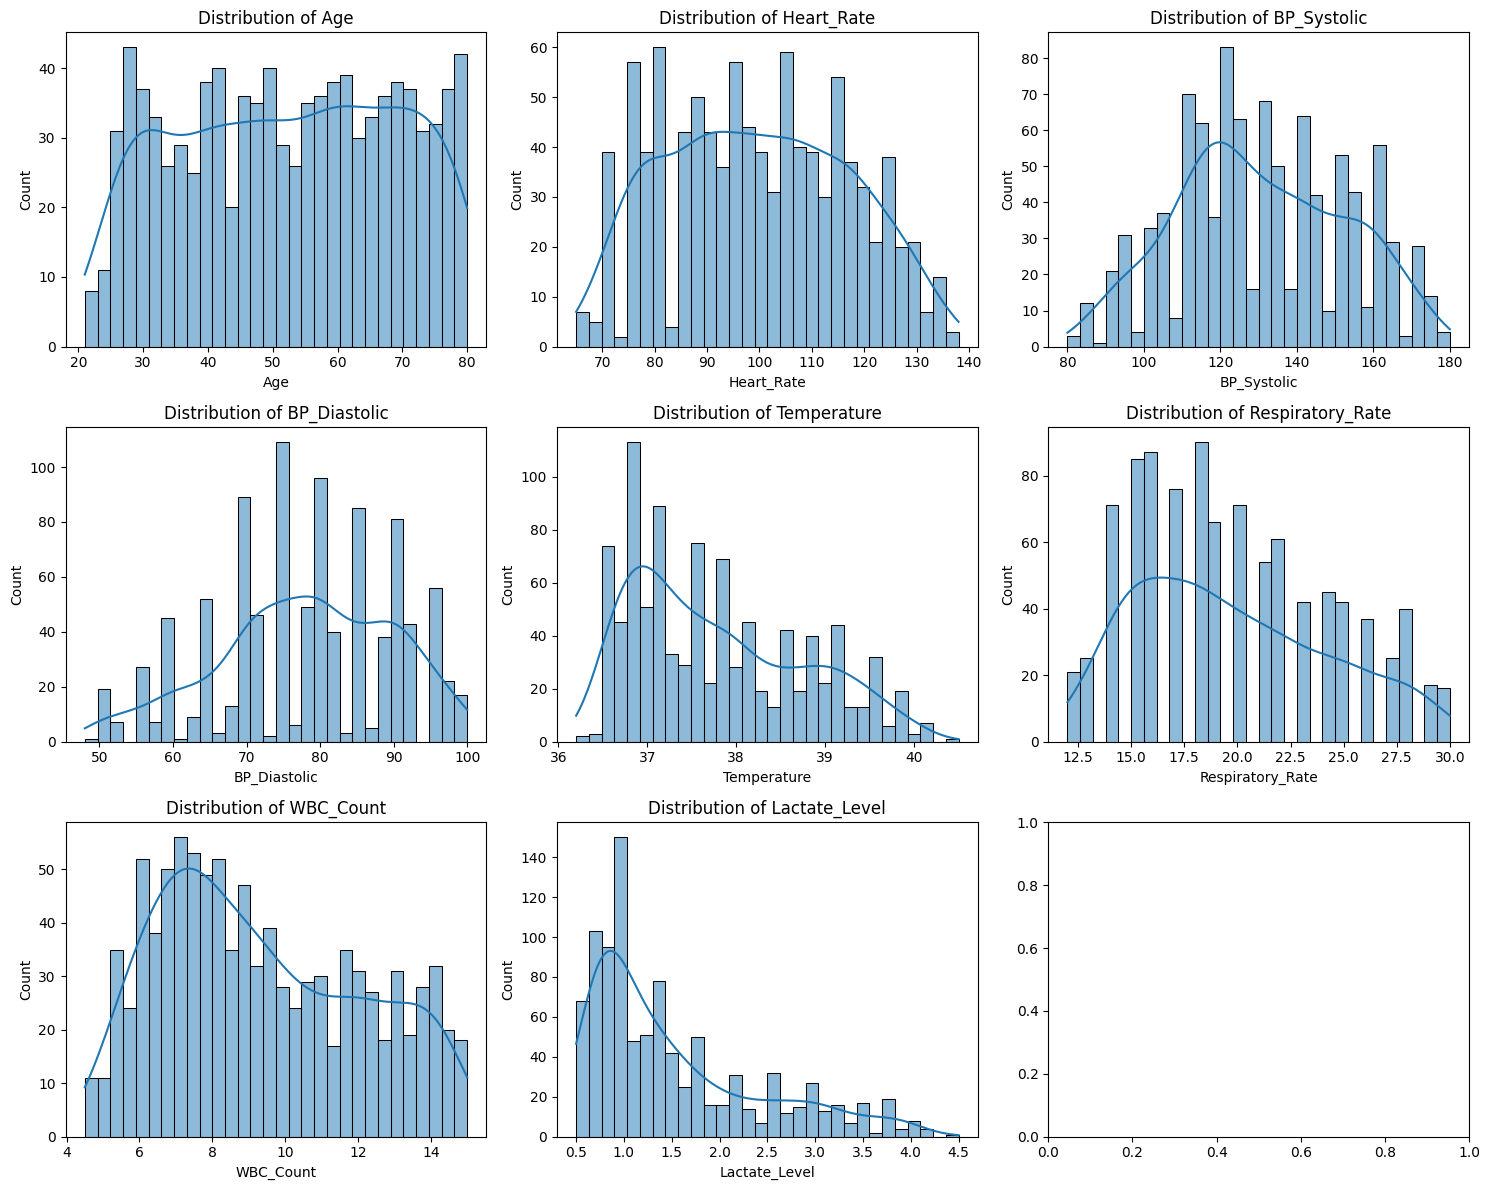

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

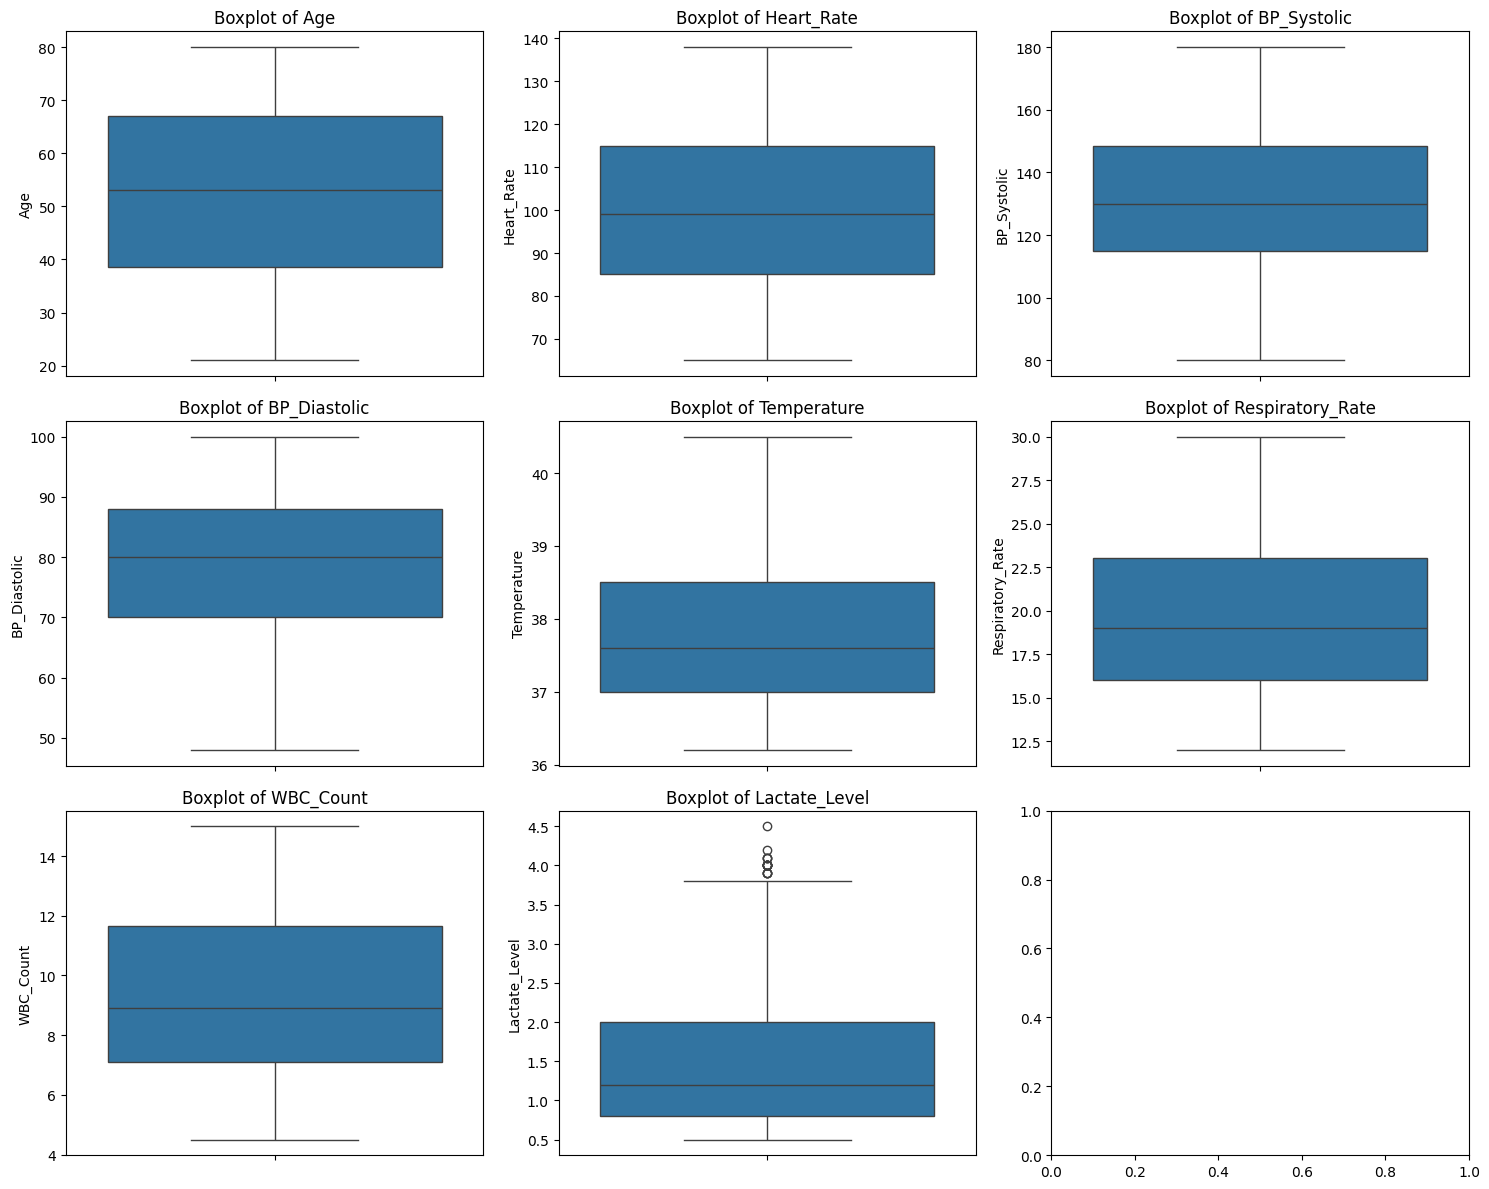

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

<Axes: xlabel='Sepsis_Label', ylabel='count'>

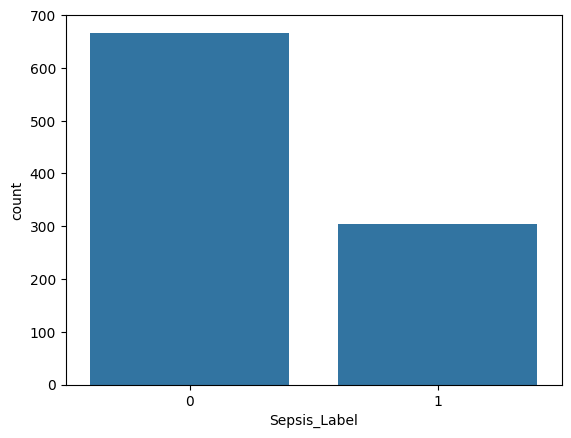

In [19]:
sns.countplot(x=df["Sepsis_Label"])

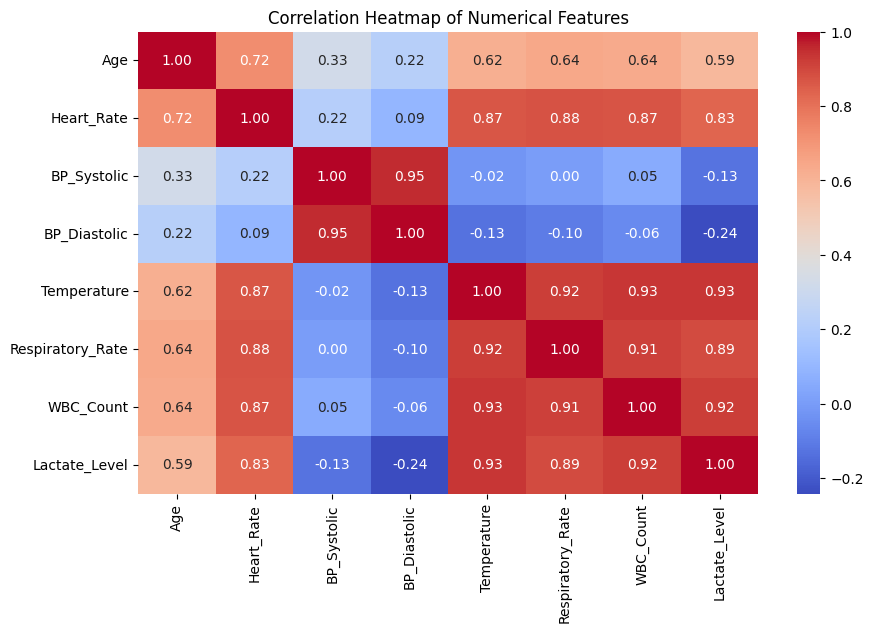

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Observations
- Age: Skewed towards older patients.
- Heart Rate & Respiratory Rate: Most values seem concentrated around normal physiological ranges.
- BP Systolic & BP Diastolic: A few potential outliers.
- Temperature: A normal distribution, with some higher values indicating fever.
- WBC Count & Lactate Level: Some high values could indicate infection/sepsis.
### Missing Values:
- Significant missing values in Age (19), Heart Rate (20), BP (20), WBC Count (21), Lactate Level (21), Clinical Notes (2).
- Will need imputation strategies (mean/median for numerical, mode for categorical, or dropping rows if necessary).
### Summary Statistics:
- Age: Ranges from 2 to 80 years.
- Heart Rate: Normal range but some higher values.
- BP Systolic/Diastolic: Normal, but needs careful handling of outliers.
- Temperature: Most values are within normal fever ranges.
- WBC Count: Some very high values, indicating infection.
- Lactate Level: Higher values could indicate sepsis.
### Correlation Heatmap:
- BP Systolic & BP Diastolic are positively correlated.
- WBC Count & Lactate Level show a moderate correlation (infection indicators).
- No highly redundant features.